# Behavior Session Data

This notebook shows how to access behavior session data for one mouse, and to aggregate data across sessions to look at training history.


### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

In [2]:
# Import allenSDK and check the version, which should be >2.10.2
import allensdk
allensdk.__version__

'2.15.1'

In [3]:
# import the behavior ophys project cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the cache and get the behavior sessions table

In [4]:
# Set the path to the dataset
# cache_dir = r'/Users/marinag/Documents/Data/VisualBehavior/'
cache_dir = '/data/'

In [5]:
# If you are working with data in the cloud in Code Ocean, 
# or if you have already downloaded the full dataset to your local machine, 
# you can instantiate a local cache
cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=cache_dir, use_static_cache=True)

# If you are working with the data locally for the first time, you need to instantiate the cache from S3:
# cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
          
behavior_session_table = cache.get_behavior_session_table()   

### View a sample of the behavior session table
The `behavior_session_table` is a Pandas DataFrame with one row for every behavior session and informative metadata columns. 

The `behavior_session_table` includes sessions performed on a two-photon imaging rig (`session_type` starting with `OPHYS_`) and training sessions performed in the behavior facility (`session_type` starting with `TRAINING_`).



In [6]:
# view 10 randomly selected rows of the table using pandas sample command
behavior_session_table.sample(10)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,session_type,file_id
behavior_session_id,,,,,,,,,,,,,,,,,,,,
841426857,BEH.B-Box2,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445270,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,81.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-03-25 13:34:22.447,TRAINING_3_images_A_10uL_reward,1.081589e+09
846284880,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,447663,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,82.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,5.0,0.0,NaN,NaN,NaN,NaN,2019-04-04 12:31:49.017,TRAINING_5_images_A_handoff_ready,1.081593e+09
880775450,BEH.B-Box5,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453989,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,116.0,Vip-IRES-Cre,GCaMP6f,NaN,14.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-06-04 12:55:47.860,TRAINING_2_gratings_flashed,1.081624e+09
1053932322,BEH.F-Box5,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,539517,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,102.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,4.0,0.0,NaN,NaN,NaN,NaN,2020-10-01 13:36:23.707,TRAINING_5_images_B_epilogue,1.081788e+09
880581639,BEH.D-Box2,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,453911,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,116.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,9.0,14.0,0.0,NaN,NaN,NaN,NaN,2019-06-04 08:47:10.915,TRAINING_5_images_A_handoff_ready,1.081624e+09
978216799,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,482853,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,130.0,Sst-IRES-Cre,GCaMP6f,4.0,0.0,0.0,4.0,978201478.0,"[978296100, 978296102, 978296104, 978296110, 9...","[1018028202, 1018028206, 1018028199, 101802821...",VisualBehaviorMultiscope,2019-11-07 14:44:58.628,OPHYS_4_images_B,NaN
978554413,BEH.F-Box3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,485688,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,117.0,Sst-IRES-Cre,GCaMP6f,NaN,0.0,4.0,0.0,NaN,NaN,NaN,NaN,2019-11-08 08:53:15.091,TRAINING_5_images_B_epilogue,1.081762e+09
1027794914,BEH.G-Box4,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,513626,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,146.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,2020-06-03 11:40:17.937,TRAINING_1_gratings,1.085378e+09
962230926,BEH.F-Box1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,477202,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,NaN,20.0,23.0,0.0,NaN,NaN,NaN,NaN,2019-10-07 12:50:30.991,TRAINING_4_images_B_training,1.081749e+09


## Select a mouse for analysis
We'll choose one mouse id from the full list of unique mouse IDs in the dataset

In [7]:
mouse_id = behavior_session_table['mouse_id'].unique()[76]
mouse_id

'440298'

### Query the full behavior sessions table for all sessions that this mouse performed

This will return a subset of the full `behavior_session_table` in which the mouse_id matches our `mouse_id` variable (mouse 445002). The table should be returned in order of date of acquisition, but we'll use the Pandas command `sort_values(by = 'date_of_acquisition')` just to be sure.  

What we then see is a table that has metadata for every session performed by this mouse, in sequential order. The `equipment_name` column tells us where the session was run on that day and the `session_type` column tells us the name of the session type. See the technical white paper for a detailed description of the progression of stages.



In [8]:
this_mouse_table = behavior_session_table.query('mouse_id == @mouse_id').sort_values(by = 'date_of_acquisition')
# note that the following is functionally equivalent if you find the syntax easier to read: 
# this_mouse_table = behavior_session_table[behavior_session_table['mouse_id'] == mouse_id]
this_mouse_table

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,session_type,file_id
behavior_session_id,,,,,,,,,,,,,,,,,,,,
831129394,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,81.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-01 13:25:23.766,TRAINING_0_gratings_autorewards_15min,1.085362e+09
832021447,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,84.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-04 14:21:34.570,TRAINING_1_gratings,1.085362e+09
832544149,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,85.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-05 13:52:38.642,TRAINING_1_gratings,1.085362e+09
833328750,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,86.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-06 14:27:39.035,TRAINING_1_gratings,1.085362e+09
834087859,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,87.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-07 14:01:17.016,TRAINING_1_gratings,1.085362e+09
834903060,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,88.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-08 14:38:02.472,TRAINING_2_gratings_flashed,1.081585e+09
835557296,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,91.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2019-03-11 12:33:20.147,TRAINING_2_gratings_flashed,1.081586e+09
836166694,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,92.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-03-12 14:54:22.690,TRAINING_3_images_A_10uL_reward,1.081586e+09
836761653,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,93.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,2019-03-13 12:53:27.462,TRAINING_3_images_A_10uL_reward,1.081587e+09


For this mouse, we can see that it progressed through a series of training stages starting on 3/15/2019 in behavior training boxes `BEH.B-Box3` and `BEH.B-Box1`.

On 4/1/2019, it reached the `TRAINING_5_images_A_handoff_ready`, which meant that it was ready for transition to an imaging rig as soon as space became available. 

On 4/4/2019, it was transitioned to ophys rig `CAM2P.3`, where it then underwent three days of habituation without imaging. This is evidenced by the fact that the session type for 4/4/2019, 4/5/2019, and 4/8/2019 was `OPHYS_0_images_A_habituation` and there was no associated `ophys_session_id`.

The first day of imaging for this mouse was on 4/9/2019, with `session_type = OPHYS_1_images_A`.

Note that this mouse has two `OPHYS_5_images_B_passive` sessions, the first taken in order (immediately after `OPHYS_4_images_B`), and second taken at the end of the sequence. The first `OPHYS_5_images_B_passive` does not have an `ophys_session_id` associated with it. This is likely due to that first session failing to meet quality control standards and being excluded from the dataset. The second `OPHYS_5_images_B_passive` was likely a retake, taken after the first was identified as having been failed.  

In general, ophys behavior sessions that do not have associated ophys_session_ids are sessions for which the ophys data has been removed do to failure to meet quality control standards.

## Aggregate data across all behavior sessions for this mouse

Here we will iterate over all sessions for this mouse, build a `behavior_session_dict` which will have one behavior session object for every session that this mouse performed, with the key being the `behavior_session_id`

Note that this could take many minutes to complete. For each session in our new table, `this_mouse_table`, we are loading the behavior session NWB file from AWS, opening it as a BehaviorSession object using the AllenSDK, and adding that object as an entry to the dictionary. 

If your cache directory is set to a location on your local computer, the NWB file for each session will be downloaded and added to the cache. This can take some time. If you were to re-run this cell a second time, it would access your cached NWB files instead of downloading them from AWS, allowing it to run substantially faster.  

It is important to note that we will only be loading the behavior data here, even for sessions that had corresponding 2-photon imaging data. The `get_behavior_ophys_experiment` method would be used to get behavior *and* ophys data for ophys sessions. See the <b>OphysSessionData</b> notebook for details.

When the below cell completes, all behavior sessions for this mouse will be held in memory in the `behavior_session_dict` dictionary.  



In [9]:
behavior_session_ids = this_mouse_table.index.values
behavior_session_dict = {}
for behavior_session_id in behavior_session_ids:
    behavior_session_dict[behavior_session_id] = cache.get_behavior_session(behavior_session_id)

/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version 

## Examine attributes of one `BehaviorSession` 

Below we will give a brief overview of what data is available for each `BehaviorSession`


Let's look at some of the attributes of the last "handoff ready session"

We can filter the full table to get the last `TRAINING_5_images_A_handoff_ready` session. This would have been the last training session before the animal was subsequently handed off to the ophys team, after which all sessions were performed on a two-photon miroscope.

Each `session_type` is distinguished by what stimulus was shown and what stage of training or imaging the mouse was in. 

<b> To learn more about the details of each `session_type`, see the VISUAL BEHAVIOR TASK OVERVIEW. </b>



In [10]:
# get the last "TRAINING_5_" session_type
behavior_session_id = this_mouse_table.query('session_type == "TRAINING_5_images_A_handoff_ready"').index[-1]
# note that the following is functionally equivalent if you find the syntax easier to read: 
# behavior_session_id = this_mouse_table[this_mouse_table['session_type'] == "TRAINING_5_images_A_handoff_ready"].index[-1]

# get the BehaviorSession object for this behavior session from the dictionary we created earlier
behavior_session = behavior_session_dict[behavior_session_id]

In [11]:
# list all attributes of the BehaviorSession object
behavior_session.list_data_attributes_and_methods()

['behavior_session_id',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'licks',
 'metadata',
 'raw_running_speed',
 'rewards',
 'running_speed',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials']

Note that any attribute can be followed by a `?` in a Jupyter Notebook to see the docstring. For example, running the cell below will make a frame appear at the bottom of your browser with the docstring for the `running_speed` attribute.

In [12]:
behavior_session = behavior_session_dict[behavior_session_id]
behavior_session.running_speed?

Type:        property
String form: <property object at 0x7f7aeed2eb30>
Docstring:  
Running speed and timestamps, sampled at 60Hz. By default
applies a 10Hz low pass filter to the data. To get the
running speed without the filter, use `raw_running_speed`.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
pd.DataFrame
    Dataframe containing running speed and timestamps
    dataframe columns:
        timestamps: (float)
            time in seconds
        speed: (float)
            speed in cm/sec


### Metadata

The `metadata` attribute is a dictionary containing information about the `BehaviorSession` being examined, including information about the mouse, like the `full_genotype` and information about the session, such as the `session_type`

In [ ]:
behavior_session.metadata

### Task parameters

The `task_parameters` attribute contains information about the struture of the behavior task for that specific session. 

Here we can see that the `stimulus_duration_sec` is 0.25 seconds and the   `blank_duration_sec` is 0.5 seconds. This determines the inter-stimulus interval. 

In [13]:
behavior_session_dict[behavior_session_id].task_parameters

{'auto_reward_volume': 0.005,
 'blank_duration_sec': [0.5, 0.5],
 'n_stimulus_frames': 72111,
 'omitted_flash_fraction': nan,
 'response_window_sec': [0.15, 0.75],
 'reward_volume': 0.007,
 'session_type': 'TRAINING_5_images_A_handoff_ready',
 'stimulus': 'images',
 'stimulus_distribution': 'geometric',
 'stimulus_duration_sec': 0.25,
 'task': 'change detection'}

### Stimulus presentations

The `stimulus_presentations` table contains one entry for each stimulus that was presented during the session, along with important metadata including stimulus `start_time`, `image_name`, and whether the stimulus was an image change (`is_change` = True) or an image omission (`omitted` = True).

In [14]:
behavior_session.stimulus_presentations.head(5)

,duration,end_frame,flashes_since_change,image_index,image_name,is_change,omitted,start_frame,start_time,end_time
stimulus_presentations_id,,,,,,,,,,
0,0.250124,18000.0,0.0,0,im065,False,False,17985.0,299.950758,300.200882
1,0.250210,18045.0,1.0,0,im065,False,False,18030.0,300.701224,300.951433
2,0.250219,18090.0,2.0,0,im065,False,False,18075.0,301.451832,301.702052
3,0.250164,18135.0,3.0,0,im065,False,False,18120.0,302.202335,302.452499
4,0.250199,18180.0,4.0,0,im065,False,False,18165.0,302.952841,303.203040


### Trials

While the `stimulus_presentations` table has one entry for each individual stimulus that was presented, the `trials` table contains one entry for each behavioral trial, which consists of a series of stimulus presentations and is defined by the `change_time`. 

On a given trial, a `change_time` is selected from a geometric distribution between 4 and 12 flashes after the time of the last change or the last lick. 

On `go` trials, the image identity will change at the selected `change_time`. If the mouse licks within the response window (see `response_window_sec` entry of the `task_parameters attribute), that is considered a hit and a reward will be delivered. If the mouse fails to lick after the change, the trial is considered a miss.

On `catch` trials, a `change_time` is drawn, but the image identity does not change. If the mouse licks within the reward window, this is a false alarm and no reward is delivered. Correctly witholding a lick is called a correct reject. 

This definition of a `catch` trial is a conservative one, and only consideres the non-change stimulus presentations that are drawn from the same distribution as the change times. A less restrictive definition could consider every non-change stimulus presentation as a catch trial, and the false alarm rate can be computed this way as well.

If the mouse licks prior to the scheduled `change_time`, the trial is `aborted` and starts over again, using the same `change_time` for up to 5 trials in a row. This is to discourage mice from licking frequently, as they have to wait until the change time to get a reward.



In [15]:
# look at 5 random trials
behavior_session.trials.sample(5)

,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,is_change,aborted,...,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
113,809.276535,810.427317,"[809.87687672209, 809.9603160818806, 810.12709...",NaN,0.000,False,False,False,False,True,...,False,False,False,1.150782,NaN,NaN,NaN,NaN,im066,im066
288,1624.974820,1631.012189,"[1630.54516501748, 1630.6953249503858]",NaN,0.000,False,False,False,False,True,...,False,False,False,6.037369,NaN,NaN,NaN,NaN,im065,im065
607,3140.043114,3141.844319,[3141.527439569123],NaN,0.000,False,False,False,False,True,...,False,False,False,1.801205,NaN,NaN,NaN,NaN,im063,im063
529,2693.109343,2696.945307,"[2696.4783377945423, 2696.628422380192]",NaN,0.000,False,False,False,False,True,...,False,False,False,3.835964,NaN,NaN,NaN,NaN,im066,im066
627,3254.369940,3263.893031,"[3259.9737464580685, 3260.2572464279365, 3260....",3259.973746,0.007,True,False,False,True,False,...,False,False,False,9.523091,3259.973746,195446.0,3259.64465,0.329096,im065,im063


We can examine one trial in some detail. Let's randomly select a hit trial. 

Some things to note:
* The trial started at 831.2635398912244 seconds (`start_time`) relative to the start of the session.
* The stimulus changed from 'im063' (`intial_image_name`) to 'im069' (`change_image_name`) at t = 834.287206646593 seconds (`change_time`) relative to the start of the session.
* The animal's first lick (`lick_times[0]`) and `response_time` was at t = 834.69975263 seconds relative to the start of the session.
* The `response_latency`, which is `response_time` - `change_time`, was 0.41254598174464263 seconds.
* A reward (`reward_time`) was delivered at 834.6997526283376 seconds relative to the start of the session. This was coincident with the first lick.

In [16]:
behavior_session.trials.query('hit').sample(random_state=0).to_dict('records')

[{'start_time': 1712.116697982885,
  'stop_time': 1720.1720967957517,
  'lick_times': array([1716.53632556, 1716.61971894, 1716.86988826, 1716.98660287,
         1717.10337204, 1717.23680377, 1717.37018203, 1717.47025015,
         1717.6036877 , 1717.73710363, 1718.02067646, 1718.17075606]),
  'reward_time': 1716.5363255622797,
  'reward_volume': 0.007,
  'hit': True,
  'false_alarm': False,
  'miss': False,
  'is_change': True,
  'aborted': False,
  'go': True,
  'catch': False,
  'auto_rewarded': False,
  'correct_reject': False,
  'trial_length': 8.05539881286677,
  'response_time': 1716.5363255622797,
  'change_frame': 102884.0,
  'change_time': 1715.9070473431634,
  'response_latency': 0.6292782191162587,
  'initial_image_name': 'im061',
  'change_image_name': 'im077'}]

The `trials` table includes the times of licks and rewards during each trial, but this information is also available in separate tables, described below.

### Lick times

The `licks` attribute is a dataframe with one entry for every detected lick onset time, assigned the time of the corresponding visual stimulus frame.

In [17]:
behavior_session.licks.sample(5)

,timestamps,frame
2438,2722.879394,163263
490,774.036175,46411
1874,2294.591556,137583
3115,3523.317408,211257
2509,2767.776236,165955


### Rewards

The `rewards` attribute is a dataframe containing one entry for every reward that was delivered, assigned the time of the corresponding visual stimulus frame. `auto_rewarded` is True if the reward was delivered without requiring a preceding lick. The first 5 change trials of each session are `auto_rewarded` = True.

In [18]:
behavior_session.rewards.sample(5)

,volume,timestamps,auto_rewarded
37,0.007,1340.200059,False
131,0.007,3487.276475,False
47,0.007,1609.547774,False
59,0.007,1923.859021,False
144,0.007,3750.753621,False


### Running speed

Mice are free to run on a circular disc during task performance. The `running_speed` table contains one entry for each read of the analog input line monitoring the encoder voltage, polled at ~60 Hz.

In [19]:
behavior_session.running_speed.head()

,timestamps,speed
0,0.000000,0.015420
1,0.016199,4.072436
2,0.032890,7.888294
3,0.049588,11.231527
4,0.066925,13.908257


### Stimulus templates

The `stimulus_templates` attribute is a dataframe containing one row per stimulus shown during the change detection task. The index is the `image_name`. The columns contain numpy arrays of the stimuli that were shown during the session. 

The `unwarped` images represent the stimuli as they were seen by the mouse after correcting for distance from the mouse eye to the screen. The `warped` images show the exact image that was displayed on the stimulus monitor after spherical warping was applied to account for distance from the mouse's eye.  

In [ ]:
behavior_session.stimulus_templates

In [ ]:
stimulus_templates = behavior_session.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[0]], cmap='gray')

### Stimulus timestamps

Finally, a very important piece of information - the timestamps for each frame of visual stimulus display. 

All behavioral measurements (`running_speed`, `licks`, & `rewards`) are made at the frequency of visual stimulus display (60Hz) and share frame times with the `stimulus_presentations`. You can use the frame index from any of the other behavior tables to determine the corresponding timestamp. 

In [ ]:
behavior_sessions.stimulus_timestamps

## Plot behavior data for a portion of one session

First, add a column to the stimulus_presentations table that assigns a unique color to every stimulus

In [20]:
unique_stimuli = [stimulus for stimulus in behavior_session.stimulus_presentations['image_name'].unique()]
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
behavior_session._stimuli._presentations.value['color'] = behavior_session.stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

Now make some simple plotting functions to plot these datastreams

In [21]:
def plot_running(ax, initial_time, final_time):
    '''
    a simple function to plot running speed between two specified times on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    running_sample = behavior_session.running_speed.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        running_sample['timestamps'],
        running_sample['speed']
    )

def plot_licks(ax, initial_time, final_time):
    '''
    a simple function to plot licks as dots between two specified times on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    licking_sample = behavior_session.licks.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        licking_sample['timestamps'],
        np.zeros_like(licking_sample['timestamps']),
        marker = 'o',
        color = 'black',
        linestyle = 'none'
    )
    
def plot_rewards(ax, initial_time, final_time):
    '''
    a simple function to plot rewards between two specified times as blue diamonds on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    rewards_sample = behavior_session.rewards.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        rewards_sample['timestamps'],
        np.zeros_like(rewards_sample['timestamps']),
        marker = 'd',
        color = 'blue',
        linestyle = 'none',
        markersize = 12,
        alpha = 0.5
    )
    
def plot_stimuli(ax, ti, tf):
    '''
    a simple function to plot stimuli as colored vertical spans on a s
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    stimulus_presentations_sample = behavior_session.stimulus_presentations.query('end_time >= @initial_time and start_time <= @final_time')
    for idx, stimulus in stimulus_presentations_sample.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus['color'], alpha=0.25)

Select a time period during the session and generate the plot

<Figure size 640x480 with 0 Axes>

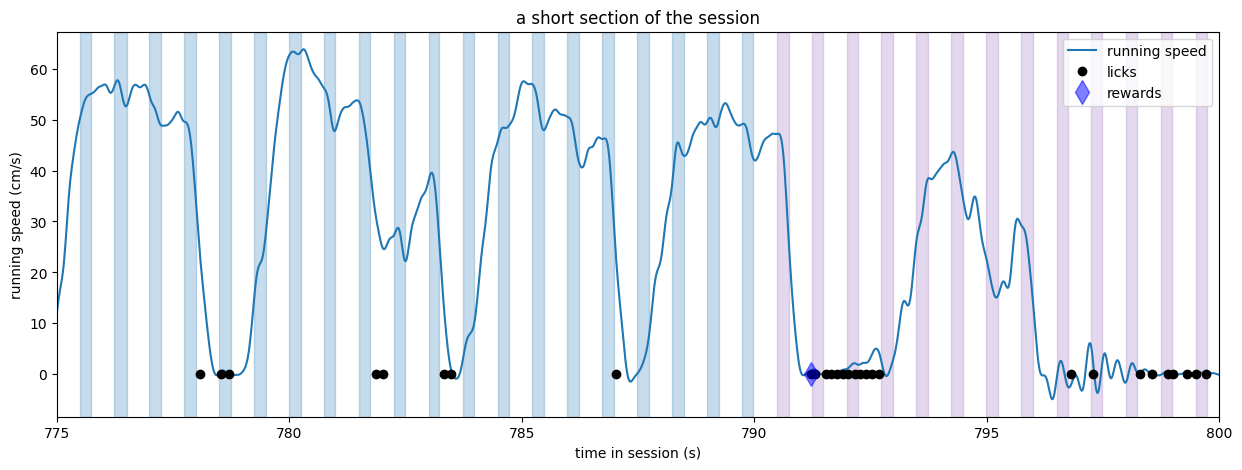

In [22]:
initial_time = 775 # initial time for plot, in seconds
final_time = 800 # final time for plot, in seconds

plt.clf()
fig, ax = plt.subplots(figsize = (15,5))
plot_running(ax, initial_time, final_time)
plot_licks(ax, initial_time, final_time)
plot_rewards(ax, initial_time, final_time)
plot_stimuli(ax, initial_time, final_time)

ax.legend(['running speed', 'licks', 'rewards'])

ax.set_ylabel('running speed (cm/s)')
ax.set_xlabel('time in session (s)')
ax.set_xlim(initial_time, final_time)
ax.set_title('a short section of the session');

Above, we can see that stimuli were being delivered at a regular cadence (250 ms on, 500 ms off). There were changes to new stimuli at t = 778.6 and t = 793.7, as indicated by the change in the color of the bars. The mouse licked inside of the required response window following both stimulus changes and received a reward coincident with the first lick following the change. The subsequent licks are likely a result of the mouse consuming the water reward. There was also a brief bout of two licks, likely representing impulsivity, at t = 786.9.

## Evalute behavior performance across all sessions for this mouse

One useful method of the `BehaviorSession` object is the `get_performance_metrics` method, which returns some summary metrics on the session.



In [23]:
# get behavior performance metrics for one session
behavior_session_dict[behavior_session_id].get_performance_metrics()

{'trial_count': 731,
 'go_trial_count': 182,
 'catch_trial_count': 23,
 'hit_trial_count': 140,
 'miss_trial_count': 42,
 'false_alarm_trial_count': 9,
 'correct_reject_trial_count': 14,
 'auto_reward_count': 5,
 'earned_reward_count': 140,
 'total_reward_count': 145,
 'total_reward_volume': 1.005,
 'maximum_reward_rate': 4.075808888375142,
 'engaged_trial_count': 592,
 'mean_hit_rate': 0.8502914507732698,
 'mean_hit_rate_uncorrected': 0.8566154925851164,
 'mean_hit_rate_engaged': 0.850133803520822,
 'mean_false_alarm_rate': 0.44437049628376163,
 'mean_false_alarm_rate_uncorrected': 0.4367174350592718,
 'mean_false_alarm_rate_engaged': 0.44609689480379144,
 'mean_dprime': 1.1971098252194956,
 'mean_dprime_engaged': 1.1933102334054815,
 'max_dprime': 1.7904646832340632,
 'max_dprime_engaged': 1.5810766796714655}

You can also access performing metrics computed on a rolling basis across trials using the `get_rolling_performance_df` method

In [24]:
behavior_session.get_rolling_performance_df()

,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
trials_id,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
726,2.165623,0.730337,0.730337,0.272727,0.272727,1.218418
727,2.003247,0.722222,0.722222,0.300000,0.300000,1.113856
728,1.833362,0.711111,0.711111,0.300000,0.300000,1.081034


### Aggregate performance metrics across sessions 

We can build out a new table that has all performance data for every session by iterating over the entries of our `behavior_session_dict`

This might take a minute or so. The AllenSDK will be extracting the performance data from the NWB file for every session individually.


In [25]:
# Let's use list comprehension to collect the metrics for each session
behavior_metrics_list = [behavior_session_dict[behavior_session_id].get_performance_metrics() for behavior_session_id in behavior_session_ids]
# Now turn it into a dataframe and set the index to be the behavior_session_id
behavior_performance_table = pd.DataFrame(behavior_metrics_list).set_index(behavior_session_ids)


In [26]:
behavior_performance_table.head()

,trial_count,go_trial_count,catch_trial_count,hit_trial_count,miss_trial_count,false_alarm_trial_count,correct_reject_trial_count,auto_reward_count,earned_reward_count,total_reward_count,...,mean_hit_rate,mean_hit_rate_uncorrected,mean_hit_rate_engaged,mean_false_alarm_rate,mean_false_alarm_rate_uncorrected,mean_false_alarm_rate_engaged,mean_dprime,mean_dprime_engaged,max_dprime,max_dprime_engaged
831129394,122,0,0,0,0,0,0,122,0,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832021447,1609,101,17,67,34,10,7,6,67,73,...,0.438318,0.427423,0.433100,0.421818,0.397976,0.435379,0.121475,-0.006137,0.792775,0.131320
832544149,1581,76,13,75,1,9,4,5,75,80,...,0.957304,0.974269,0.974991,0.787584,0.881553,0.805444,1.093624,1.089942,1.857055,1.857055
833328750,1158,189,21,140,49,7,14,7,140,147,...,0.870796,0.881694,0.935623,0.502420,0.482349,0.633119,1.485135,1.364075,2.217040,2.104946
834087859,565,294,53,124,170,7,46,17,124,141,...,0.531782,0.539226,0.832751,0.197336,0.165555,0.301101,1.129222,1.766182,2.850748,2.850748


We can merge this table with the metadata table we built for this mouse because they have the same index (`behavior_session_id`)

In [27]:
this_mouse_table = this_mouse_table.merge(
    behavior_performance_table,
    left_index = True,
    right_index = True)
    
this_mouse_table.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,mean_hit_rate,mean_hit_rate_uncorrected,mean_hit_rate_engaged,mean_false_alarm_rate,mean_false_alarm_rate_uncorrected,mean_false_alarm_rate_engaged,mean_dprime,mean_dprime_engaged,max_dprime,max_dprime_engaged
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
831129394,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,81.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832021447,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,84.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,...,0.438318,0.427423,0.433100,0.421818,0.397976,0.435379,0.121475,-0.006137,0.792775,0.131320
832544149,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,85.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,...,0.957304,0.974269,0.974991,0.787584,0.881553,0.805444,1.093624,1.089942,1.857055,1.857055
833328750,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,86.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,...,0.870796,0.881694,0.935623,0.502420,0.482349,0.633119,1.485135,1.364075,2.217040,2.104946
834087859,BEH.F,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,440298,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,87.0,Slc17a7-IRES2-Cre,GCaMP6f,NaN,...,0.531782,0.539226,0.832751,0.197336,0.165555,0.301101,1.129222,1.766182,2.850748,2.850748


#### Plot the `max_dprime` value for every session

We can see that this particular mouse performed relatively consistently for every session as it progressed through training.


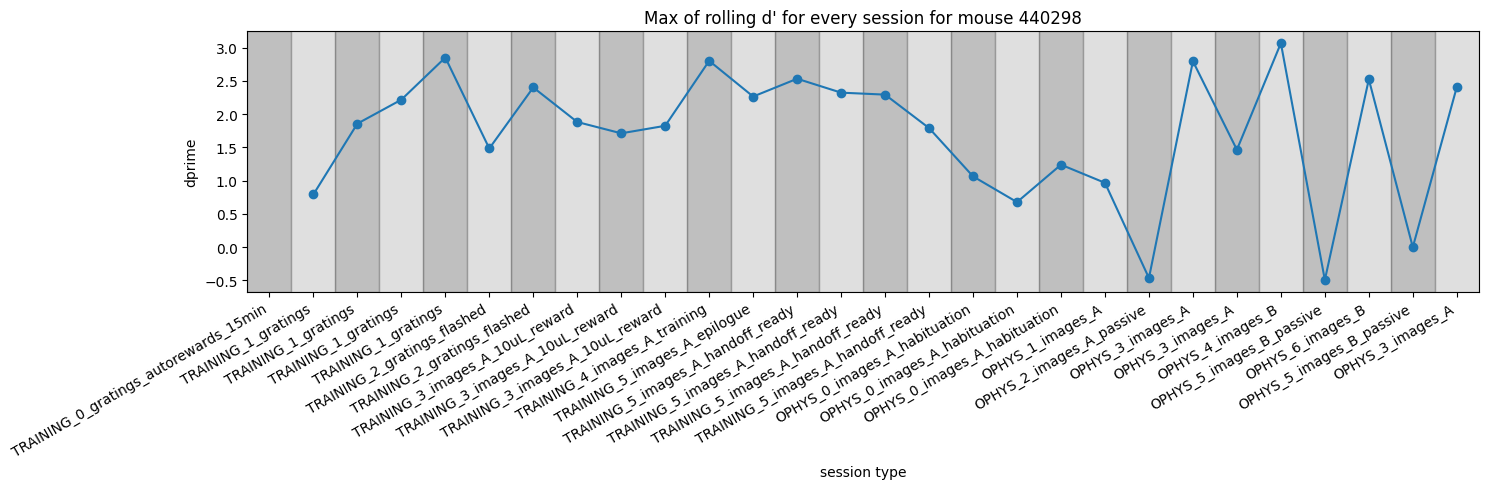

In [28]:
fig, ax = plt.subplots(figsize = (15,5))

ax.plot(
    np.arange(len(this_mouse_table)),
    this_mouse_table['max_dprime'],
    marker = 'o'
)
ax.set_xticks(range(len(this_mouse_table)))
ax.set_xticklabels(list(this_mouse_table['session_type'].values),rotation = 30, ha='right')

# make alternating black/gray vspans for visual clarity
colors = ['black', 'gray']
for ii in range(len(this_mouse_table)):
    ax.axvspan(ii - 0.5, ii + 0.5, color = colors[ii%2], alpha=0.25)

ax.set_xlim(-0.5, len(this_mouse_table) - 0.5)
ax.set_ylabel('dprime')
ax.set_xlabel('session type')
ax.set_title("Max of rolling d' for every session for mouse {}".format(mouse_id))
fig.tight_layout()

Note that the days with near zero dprime near the right side of the plot are all `passive` sessions where the lick spout was retracted and no rewards could be earned. 

Exercises: 
* Can you color the points of the behavior performance metrics plot by some piece of metadata (one of the columns) in `this_mouse_table`?
* How does the `max_dprime` metric compare with other metrics in the `rolling_performance_df`?
* What does the performance look like for a different mouse? 
* How many sessions are there for each `session_type`?
* Do all mice learn at a similar rate? 